# intialization

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("IceCreamData.csv")

In [4]:
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# visualization

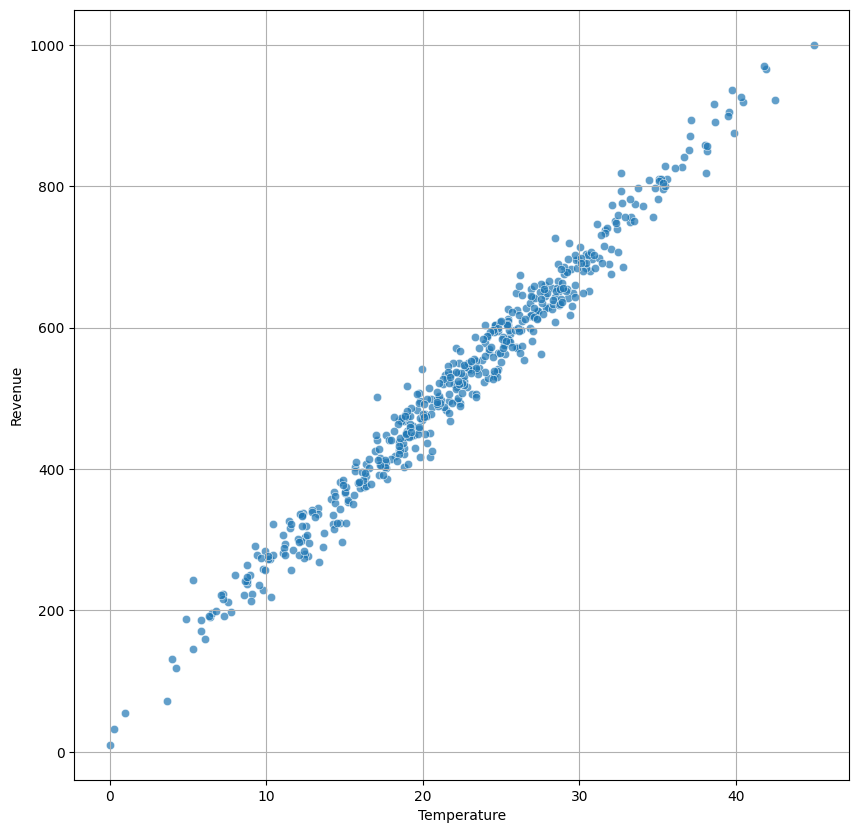

In [7]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df,x = 'Temperature',y= 'Revenue',alpha = 0.7)
plt.grid()

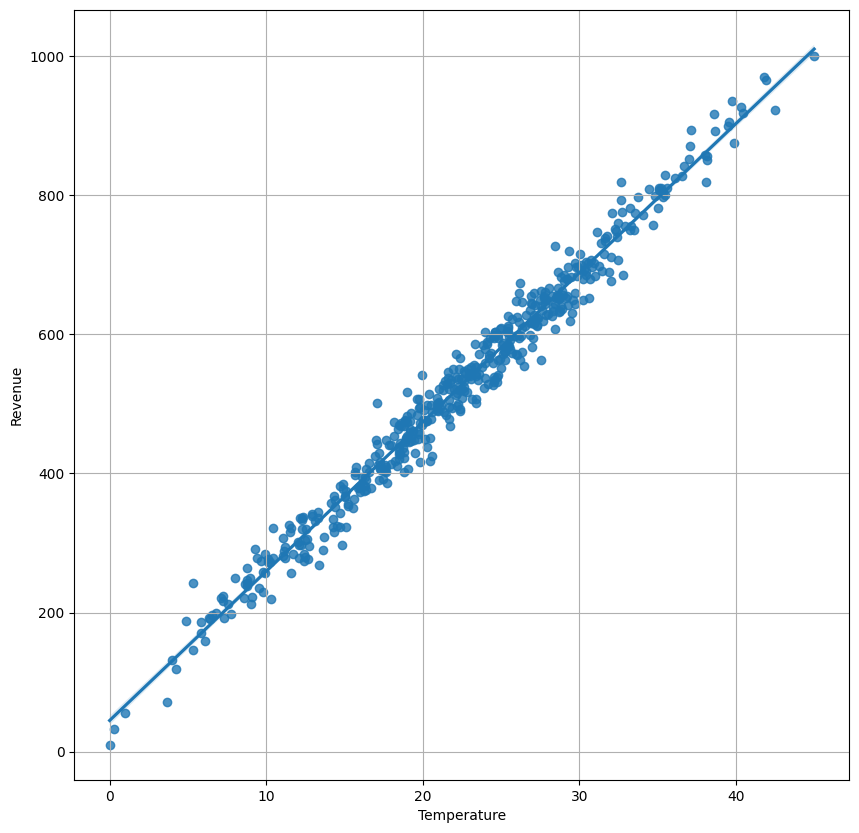

In [8]:
plt.figure(figsize = (10,10))
sns.regplot(data = df , x = 'Temperature',y = 'Revenue')
plt.grid()

# test and train data

In [9]:
X = df['Temperature']
y = df['Revenue']


In [10]:
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [11]:
print(X.shape)
print(y.shape)

(500, 1)
(500, 1)


In [12]:
from sklearn.model_selection import train_test_split as t
X_train, X_test,y_train,y_test = t(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 1)
(400, 1)
(100, 1)
(100, 1)


In [13]:
from sklearn.linear_model import LinearRegression as LR
SimpleLR = LR(fit_intercept = True)
SimpleLR.fit(X_train,y_train)

LinearRegression()

In [14]:
print('Linear Model coeffient(m)',SimpleLR.coef_)
print('Linear Model coeffient(c)',SimpleLR.intercept_)

Linear Model coeffient(m) [[21.43383928]]
Linear Model coeffient(c) [45.80060201]


# Evaluating the model

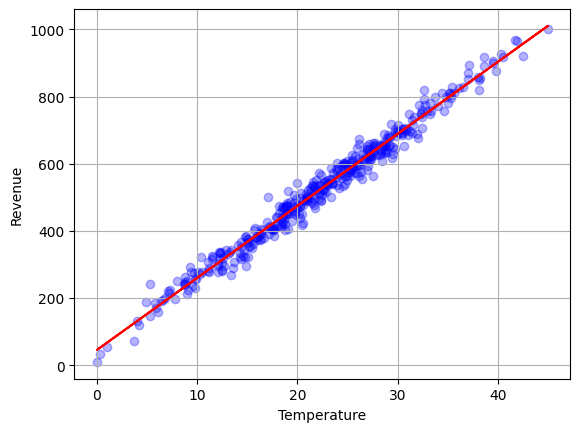

In [25]:
plt.scatter(X_train,y_train,color = 'blue',alpha = 0.3)
plt.plot(X_train,SimpleLR.predict(X_train),color = 'r')
plt.ylabel("Revenue")
plt.xlabel("Temperature")
plt.grid()

In [26]:
model_accuracy = SimpleLR.score(X_test,y_test)
model_accuracy

0.9754216021781691

In [38]:
temp_to_predict = np.array([45,5,25])
temp_to_predict = temp_to_predict.reshape(-1,1)
revenue = SimpleLR.predict(temp_to_predict)
print("the predicted revenue is:\n",revenue)

the predicted revenue is:
 [[1010.32336939]
 [ 152.96979838]
 [ 581.64658389]]
